In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mass import MassSpectrum
from mass import VanKrevelen
from mass import ErrorTable

/Users/av/Yandex.Disk.localized/Work/prog/masslib/mass.py:13: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import inset_axes as inset_axes_func


#### Load bad spectra

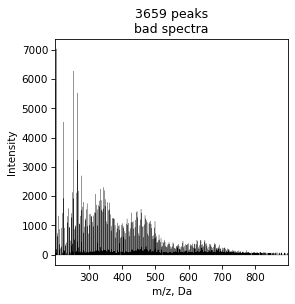

In [2]:
spec = MassSpectrum().load(filename="data/bad_masslist.txt",
                            mapper={'m/z':'mass', 'Intensity':'intensity'},
                            take_columns=['mass','intensity'],
                            sep='\t',
                            intens_min=50
                            )
fig, ax = plt.subplots(figsize=(4, 4), dpi=75)
spec.draw(ax=ax)

#### Try to assigne witwout reaallibration

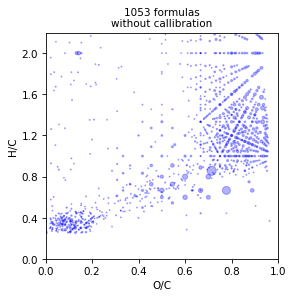

In [3]:
spec = spec.assign()
vk = VanKrevelen(spec.table).draw_scatter()

#### Self-assign by mass-difference statisitc. Take a lot of time

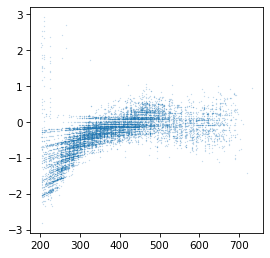

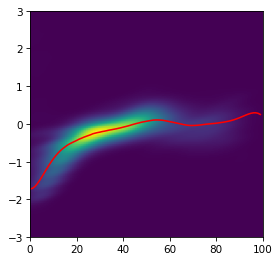

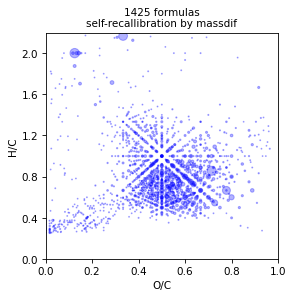

In [4]:
spec = MassSpectrum().load(filename="data/bad_masslist.txt",
                            mapper={'m/z':'mass', 'Intensity':'intensity'},
                            take_columns=['mass','intensity'],
                            sep='\t',
                            intens_min=50
                            )

err = ErrorTable().massdiff_error(spec)
spec = spec.recallibrate(err)
spec = spec.assign()
vk = VanKrevelen(spec.table).draw_scatter()

#### Recallibrate by etalon sample

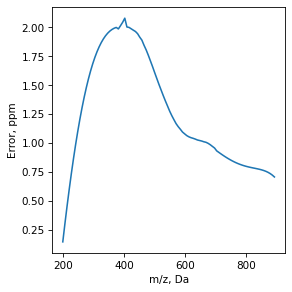

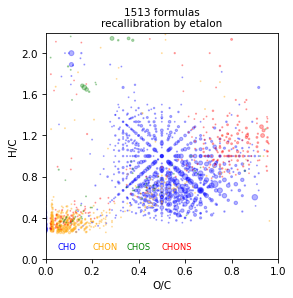

In [5]:
spec = MassSpectrum().load(filename="data/bad_masslist.txt",
                            mapper={'m/z':'mass', 'Intensity':'intensity'},
                            take_columns=['mass','intensity'],
                            sep='\t',
                            intens_min=50
                            )

etalon = MassSpectrum().load(filename="data/etalon.csv",
                            mapper={'m/z':'mass', 'I':'intensity'},
                            take_columns=['mass','intensity'],
                            sep=',',
                            )

err = ErrorTable().etalon_error(spec=spec, etalon=etalon)
spec = spec.recallibrate(err)
spec = spec.assign()
vk = VanKrevelen(spec.table).draw_scatter()

#### Self-recallibrate by assign error

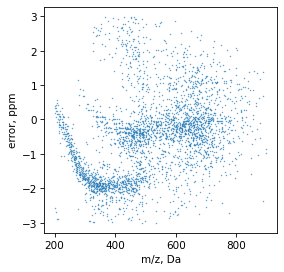

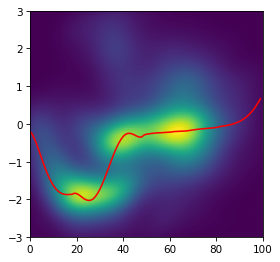

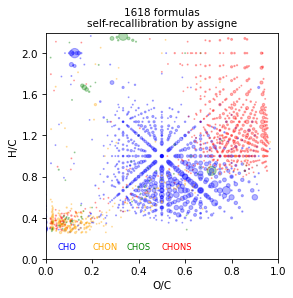

In [2]:
spec = MassSpectrum().load(filename="data/bad_masslist.txt",
                            mapper={'m/z':'mass', 'Intensity':'intensity'},
                            take_columns=['mass','intensity'],
                            sep='\t',
                            intens_min=50
                            )
                            
#Here we need to extend search range to estimate diaposaone of optimal assigment
err = ErrorTable().assign_error(spec)
spec = spec.recallibrate(err)
spec = spec.assign()
vk = VanKrevelen(spec.table).draw_scatter()

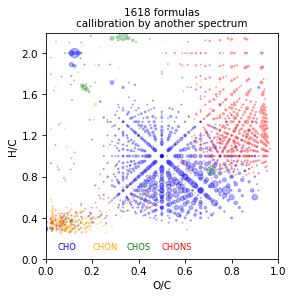

In [5]:
spec = MassSpectrum().load(filename="data/bad_masslist.txt",
                            mapper={'m/z':'mass', 'Intensity':'intensity'},
                            take_columns=['mass','intensity'],
                            sep='\t',
                            intens_min=50
                            )

spec = spec.recallibrate(err)
spec = spec.assign()
vk = VanKrevelen(spec.table).draw_scatter()

#### Set error table by yourself or load from file

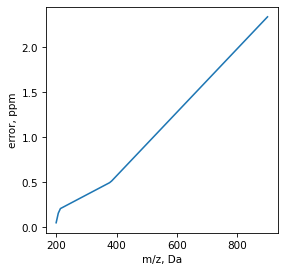

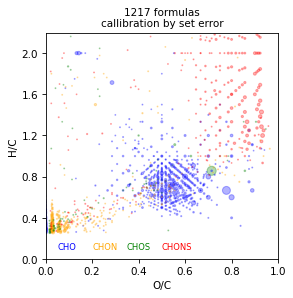

In [7]:
data = [[170, -0.4],
        [210, 0.2],
        [380, 0.5],
        [550, 1.1]]
df = pd.DataFrame(data, columns=['mass','ppm'])

err = ErrorTable(df).extrapolate() #load and extraoplate data for all diapasone
err.show_error()

spec = MassSpectrum().load(filename="data/bad_masslist.txt",
                            mapper={'m/z':'mass', 'Intensity':'intensity'},
                            take_columns=['mass','intensity'],
                            sep='\t',
                            intens_min=50
                            )

spec = spec.recallibrate(err)
spec = spec.assign()
vk = VanKrevelen(spec.table).draw_scatter()

#### Get error for restrict diapasone and extrapolate it for full spectra

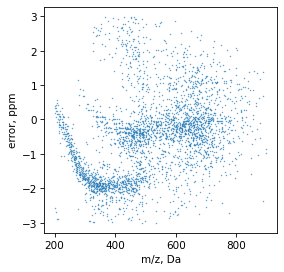

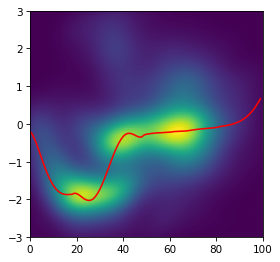

In [3]:
spec = MassSpectrum().load(filename="data/bad_masslist.txt",
                            mapper={'m/z':'mass', 'Intensity':'intensity'},
                            take_columns=['mass','intensity'],
                            sep='\t',
                            intens_min=50
                            )

err = ErrorTable().assign_error(spec)

As at seen form figure above from 450 error may be not correct, so just short our spectr

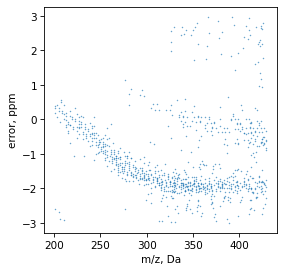

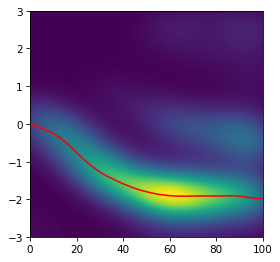

In [4]:
spec = MassSpectrum().load(filename="data/bad_masslist.txt",
                            mapper={'m/z':'mass', 'Intensity':'intensity'},
                            take_columns=['mass','intensity'],
                            sep='\t',
                            intens_min=50,
                            mass_min=0,
                            mass_max=430
                            )

err = ErrorTable().assign_error(spec)

and now we extraoplate this for all data

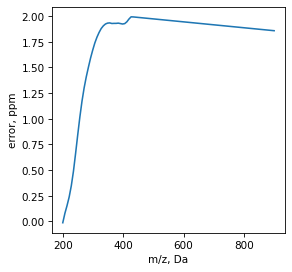

In [5]:
err = err.extrapolate(ranges=(200,900))
err.show_error()

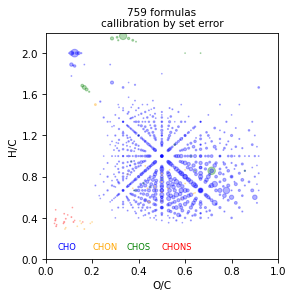

In [6]:
spec = spec.recallibrate(err)
spec = spec.assign()
vk = VanKrevelen(spec.table).draw_scatter()